In [7]:
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml',
               'machine-learning-databases', 'iris','iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')

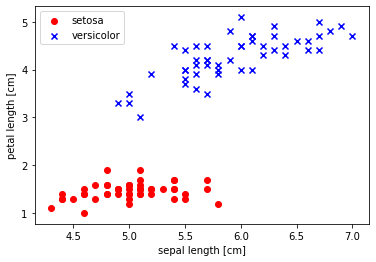

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

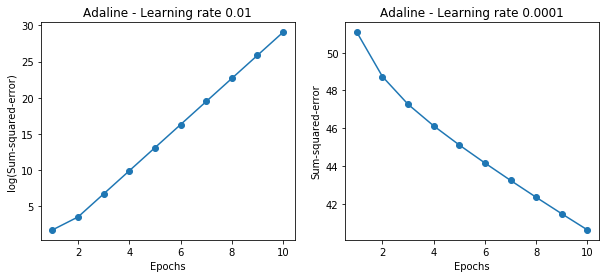

In [12]:
from adal_perceptron1 import AdalineGD
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

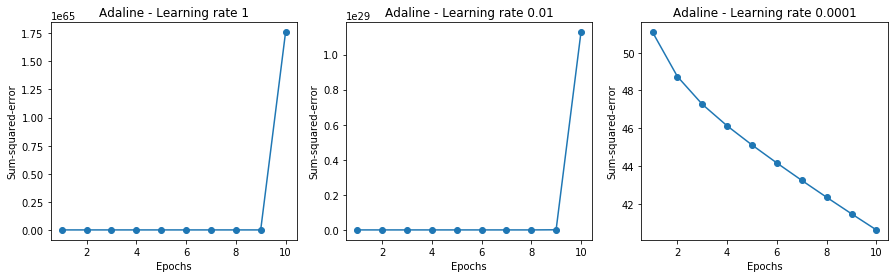

In [20]:
from adal_perceptron1 import AdalineGD
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ada1 = AdalineGD(n_iter=10, eta=1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 1')
ada2 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.01')
ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1),ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

Questions:    
1. Why LR with 1 and 0.01 are the same. 
2. Why we apply log to 0.01?

In [29]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


No handles with labels found to put in legend.


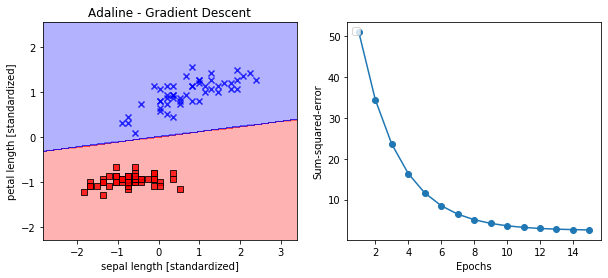

In [48]:
from perceptron_util6 import plot_decision_regions

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_decision_regions(X=X_std, y=y,  ax=ax[0], classifier=ada_gd)
ax[0].set_title('Adaline - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')

ax[1].plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
plt.legend(loc='upper left')
plt.show()